In [4]:
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
from time import sleep
from lxml import etree
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains

In [5]:
chrome_options = Options()
chrome_options.add_experimental_option("debuggerAddress", "127.0.0.1:9222")
bro = webdriver.Chrome(options=chrome_options)
window_handles = bro.window_handles
bro.switch_to.window(window_handles[0])
bro.execute_script("window.scrollTo(0,document.body.scrollHeight)")

In [6]:
bro.maximize_window()

In [7]:
A = bro.find_element(By.XPATH,'//button[@class="ecom-pagination-item-link"]')

In [14]:
bro.execute_script("arguments[0].click()", A)

In [ ]:
# path = bro.find_element(By.XPATH,'//li[@class="ecom-pagination-next"]')
# # js= 'arguments[0].class="aaaa"'
# # js='document.querySelector("#su").value="test"'
# # driver.execute_script(js,path)
# bro.execute_script("arguments[0].setAttribute(arguments[1],arguments[2])",path,'aria-disabled','false')

In [24]:
page = bro.page_source

<html lang="zh-cn"><head>
<script crossorigin="anonymous" async="" src="https://lf3-cdn-tos.bytescm.com/obj/static/log-sdk/collect/5.0/collect.js"></script><script async="" src="https://compass.jinritemai.com/sif/sif.js"></script><script nonce="">  var e=function(e,t,a){if(Math.ceil(100*Math.random())<=100*t){var o="4499",d="20590",n={ev_type:"batch",list:[{ev_type:"custom",payload:{name:"sdk_glue_load",type:"event",metrics:{},categories:{sdk_glue_load_status:e,sdk_glue_load_err_src:a,payload_bdms_aid:o,payload_bdms_page_id:d}},common:{context:{ctx_bdms_aid:o,ctx_bdms_page_id:d},bid:"web_bdms_cn",pid:window.location.pathname,view_id:"/_1",user_id:"",session_id:"0-a-1-2-c",release:"",env:"production",url:window.location.href,timestamp:+new Date,sdk_version:"1.6.1",sdk_name:"SDK_SLARDAR_WEB"}}]},i=new XMLHttpRequest;i.open("POST","https://mon.zijieapi.com/monitor_browser/collect/batch/?biz_id=web_bdms_cn",!0),i.setRequestHeader("Content-type","application/json"),i.send(JSON.stringify(n))
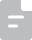
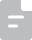

In [25]:
print(page)

In [26]:
HtmlData = etree.HTML(page)

In [27]:
# for tr in tr_list:
#     a = tr.xpath(".//div[@class='name-olPpkd']/text()")
    

In [28]:
datasss = pd.DataFrame(columns=["店铺名称","成交金额_min","成交金额_max","点击次数_min","点击次数_max","商品ID","商品名称","是否首次上榜","价格区间","排名"])
tr_list = HtmlData.xpath("//tr[@class='ecom-table-row ecom-table-row-level-0']")
for tr in tr_list:
    info_dicts = {}
    info_dicts["店铺名称"] = i["product_info"]["shop_list"][0]["shop_name"]

    try:
        info_dicts["点击次数_min"] = i["product_click_cnt"]["value_range"][0]["value"]
        info_dicts["点击次数_max"] = i["product_click_cnt"]["value_range"][1]["value"]
    except Exception as e:
        # print(e)
        pass
    finally:
        try:
            info_dicts["成交金额_min"] = i["new_pay_amt"]["value_range"][0]["value"]
            info_dicts["成交金额_max"] = i["new_pay_amt"]["value_range"][1]["value"]
        except Exception as e:
            # print(e)
            pass   
        finally:    
            info_dicts["价格区间"] = i["product_info"]["price_bin"]
            info_dicts["是否首次上榜"] = i["product_info"]["newly_on_ranking"]
            info_dicts["排名"] = i["product_info"]["rank"]
            info_df = pd.DataFrame(info_dicts,index=[0])
            datasss = pd.concat([datasss,info_df])



NameError: name 'i' is not defined